<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>EABL STOCK PRICE PREDICTION </strong></span></b> </div> 

# Business Understanding:  
## Overview:  
East African Breweries Limited (EABL) has a rich history rooted in East Africa's economic and social fabric. Established in 1922, EABL has grown to become a leading beverage company, contributing significantly to the region's economy. Over the years, EABL has built a portfolio of iconic brands, becoming synonymous with quality and innovation in the brewing industry.EABL holds a pivotal role in the East African beverage market, offering a diverse range of alcoholic and non-alcoholic products. Its flagship brands, including Tusker Lager and Guinness, have become household names, reflecting the company's commitment to quality craftsmanship. Despite its historical success, East African Breweries Limited (EABL) has been facing significant challenges in the form of evolving regulatory landscapes. The recent government's directive to collect taxes within 24 hours after goods leave the store, influenced by the new Finance Act of 2023, has introduced a new layer of complexity. This has prompted investors and stakeholders to reevaluate their strategies in light of the changing regulatory landscape. To navigate this uncertainty, our goal is to provide investors with a comprehensive analysis and forecasting model for EABL's stock prices, incorporating various economic indicators and sentiments.

## Problem Statement:
The dynamic regulatory environment and recent government directives have created uncertainty in the market, affecting EABL's stock performance. Investors are seeking ways to cushion themselves from potential market crashes and make informed decisions in the face of evolving economic conditions. To address this, we aim to develop a multifaceted analysis, including time series forecasting, sentiment analysis, volatility insights, abnormal trade volume investigation, dividends analysis, trend analysis, and lag analysis of market indicators.

### <b> <span style='color:#16C2D5'>|</span> Challenges</b>
1. Regulatory Uncertainty: The recent changes in tax collection directives pose a challenge for EABL's financial stability. Understanding and predicting the impact of these changes on stock prices is challenging but crucial.

2. Data Integration: Incorporating diverse data sources like Twitter sentiments, inflation rates, exchange rates, unemployment rates, and dividends payout requires efficient data integration and cleaning to ensure the accuracy and reliability of the analysis.

3. Sentiment Analysis: Analyzing sentiments from various sources (Twitter, news articles, Instagram) poses the challenge of dealing with unstructured data and ensuring that sentiments are accurately captured and interpreted.

4. Market Volatility: Predicting stock prices and identifying potential risks related to EABL's stock volatility demands a robust model capable of handling the inherent unpredictability in financial markets.

5. Complexity of Market Indicators: Understanding the lag effects of market indicators such as inflation rates, GDP, USD exchange rates, and unemployment rates on EABL stocks requires a sophisticated analytical approach.

### <b> <span style='color:#16C2D5'>|</span> Objectives</b>
1. Time Series Forecasting:  
   Objective: Develop an accurate time series forecasting model for EABL's stock prices. Incorporate Twitter(Stocks) sentiments, inflation rates, exchange rates, yearly unemployment rates, and EABL dividends payout.

2. Sentiment Analysis:  
   Objective 1: Perform a sentiment analysis of EABL products as well as market sentiments (Twitter).  
   Objective 2: Conduct sentiment analysis on news articles and Instagram.  
   Objective 3: Identify key sentiment drivers.  

3. Viability Assessment:   
   Objective 1: Uncover EABL's stock volatility patterns for risk assessment.  
   Objective 2: Develop a risk model to identify and quantify potential risks for managing investment strategies.  
   Objective 3: Investigate abnormal trade volume spikes and analyze their causes and implications.  

4. Dividends Analysis:  
   Objective: Analyze the rates of EABL dividends payout.  

5. Trend Analysis:  
   Objective: Analyze trends, seasonality, and autocorrelation patterns in EABL stock data.  

6. Lag Analysis:  
   Objective: Analyze the lag effects of market indicators (inflation rates, GDP, USD exchange rates, unemployment rates) on EABL stocks.

### <b> <span style='color:#16C2D5'>|</span> Conclusion</b>
In conclusion, EABL's current challenges necessitate a comprehensive approach to provide investors with the insights needed to make informed decisions. By combining traditional financial indicators with emerging data sources and advanced analytics, we aim to offer a holistic view of the market dynamics surrounding EABL. The analysis will not only address current uncertainties but also equip investors with tools to anticipate and navigate future trends in the stock market.

In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np
 
# Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

# Statistical models
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import pearsonr 

# Machine learning models 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

#Finance visualization libraries.
from ta.volatility import AverageTrueRange
import mplfinance as mpf

#Sentiment analysis libraries. 
import re  
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

# Hypothesis Testing (Example: t-test for Dividend Yield)
from scipy.stats import ttest_ind

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Data Understanding
1. Load the datasets.
2. Check for missing values and handle them.

Below is the stock price dataset was found in the EABL website, from 2006-2024 January:

In [2]:
df = pd.read_csv('Data/EABL-2006-2024_JAN_STOCKS.csv')
df.head()

,Date,Open,High,Low,Close,Average,Volume
0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000
1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600
2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100
3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500
4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700


In [3]:
df.shape

(4319, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319 entries, 0 to 4318
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4319 non-null   object 
 1   Open     4319 non-null   float64
 2   High     4319 non-null   float64
 3   Low      4319 non-null   float64
 4   Close    4319 non-null   float64
 5   Average  4319 non-null   float64
 6   Volume   4319 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 236.3+ KB


In [5]:
# Check the columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Average', 'Volume'], dtype='object')

We will then convert our 'Date' column to datetime format,then set it as index, which is beneficial for time series analysis.

In [6]:
# Removing extra space in the 'Date' column
df.columns = df.columns.str.strip()

# Convert 'Date' column to datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display the first few rows
df.head()

,Open,High,Low,Close,Average,Volume
Date,,,,,,
2024-01-31,104.00,111.00,104.0,110.0,106.00,42000
2024-01-30,105.00,105.00,101.0,104.0,104.00,15600
2024-01-29,105.00,105.00,99.0,103.5,100.00,596100
2024-01-26,116.25,116.25,100.0,100.0,104.50,60500
2024-01-25,119.75,120.00,118.0,118.0,118.25,5700


## Feature engineering
* **Calculate Daily Returns**

In [7]:
df['Daily_Return'] = df['Close'].pct_change()


Merge the stock price dataset with other relevant data sources, such as inflation rates, exchange rates, yearly unemployment rates, and EABL dividends payout.  
Below is the merged dataset:

In [8]:
# Load the data
df_final = pd.read_csv('Data/final_merge.csv')
#The first five rows
df_final.head()

,Unnamed: 0,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share
0,0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,NaN,6.9,161.0,1.00,0.0,NaN
1,1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,NaN,6.9,161.0,1.00,0.0,NaN
2,2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,NaN,6.9,162.0,1.00,0.0,NaN
3,3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,NaN,6.9,162.0,1.00,0.0,NaN
4,4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,NaN,6.9,163.0,1.75,0.0,NaN


In [9]:
# Drop the 'Unnamed:0' column
df_final = df_final.drop(columns=['Unnamed: 0'])
df_final.head()

,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share
0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,NaN,6.9,161.0,1.00,0.0,NaN
1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,NaN,6.9,161.0,1.00,0.0,NaN
2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,NaN,6.9,162.0,1.00,0.0,NaN
3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,NaN,6.9,162.0,1.00,0.0,NaN
4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,NaN,6.9,163.0,1.75,0.0,NaN


In [10]:
df_final.shape

(4353, 16)

In [11]:
df_final.dtypes

Date                         object
Open                        float64
High                        float64
Low                         float64
Close                       float64
Average                     float64
Volume                        int64
Month                         int64
Year                          int64
Day                           int64
Annual Average Inflation    float64
12-Month Inflation          float64
Mean                        float64
Amount                      float64
Dividends per share         float64
Earnings Per Share          float64
dtype: object

In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      4353 non-null   object 
 1   Open                      4353 non-null   float64
 2   High                      4353 non-null   float64
 3   Low                       4353 non-null   float64
 4   Close                     4353 non-null   float64
 5   Average                   4353 non-null   float64
 6   Volume                    4353 non-null   int64  
 7   Month                     4353 non-null   int64  
 8   Year                      4353 non-null   int64  
 9   Day                       4353 non-null   int64  
 10  Annual Average Inflation  4332 non-null   float64
 11  12-Month Inflation        4353 non-null   float64
 12  Mean                      4341 non-null   float64
 13  Amount                    4241 non-null   float64
 14  Dividend

The date column has data type object but we will have to convert it to datetime.There are some missing values

In [13]:
# Convert 'Date' column to datetime dtype
df_final['Date'] = pd.to_datetime(df_final['Date'])

In [14]:
# Display the number of missing values in each column
missing_values = df_final.isnull().sum()

# Display the result
print(missing_values)

Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Average                       0
Volume                        0
Month                         0
Year                          0
Day                           0
Annual Average Inflation     21
12-Month Inflation            0
Mean                         12
Amount                      112
Dividends per share           0
Earnings Per Share           21
dtype: int64


The missing values are in these columns(**Annual Average Inflation** ;21, **Mean**;12, **Amount**;112, **Earnings per share**;21). We can handle missing values by:  
1. **Backward filling**  
For columns like 'Annual Average Inflation' and 'Earnings Per Share,' which are assumed to have a continuous nature, missing values will be filled using the backward-fill method. This means that missing values are filled with the previous known value in the column.This is particularly useful when the data has a time-dependent structure.   
2. **Mean Calculation**  
For columns like 'Mean' and 'Amount' missing values will be filled with the mean of the available data in those columns.

In [15]:
# Backward Filling
df_final['Annual Average Inflation'].fillna(method='bfill', inplace=True)
df_final['Earnings Per Share'].fillna(method='bfill', inplace=True)

In [16]:
missing_values_after_ffill = df_final.isnull().sum()
print(missing_values_after_ffill)


Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Average                       0
Volume                        0
Month                         0
Year                          0
Day                           0
Annual Average Inflation      0
12-Month Inflation            0
Mean                         12
Amount                      112
Dividends per share           0
Earnings Per Share            0
dtype: int64


In [17]:
# Fill missing values with mean for 'Mean' and 'Amount' columns
df_final['Mean'].fillna(df_final['Mean'].mean(), inplace=True)
df_final['Amount'].fillna(df_final['Amount'].mean(), inplace=True)


In [18]:
missing_values_after_mean_fill = df_final.isnull().sum()
print(missing_values_after_mean_fill)


Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Average                     0
Volume                      0
Month                       0
Year                        0
Day                         0
Annual Average Inflation    0
12-Month Inflation          0
Mean                        0
Amount                      0
Dividends per share         0
Earnings Per Share          0
dtype: int64


Now that missing values have been handled,we can check at the display of the first few rows of our dataset.

In [19]:
df_final.head()

,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share
0,2024-01-31,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,7.67,6.9,161.0,1.00,0.0,12.5
1,2024-01-30,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,7.67,6.9,161.0,1.00,0.0,12.5
2,2024-01-29,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,7.67,6.9,162.0,1.00,0.0,12.5
3,2024-01-26,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,7.67,6.9,162.0,1.00,0.0,12.5
4,2024-01-25,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,7.67,6.9,163.0,1.75,0.0,12.5


Set the 'Date' column as an index:

In [20]:
df_final.set_index('Date', inplace=True)

In [21]:
# Checking the summary statistics
df_final.describe()

,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share
count,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4.353000e+03,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000
mean,203.635883,207.014186,202.370549,204.744889,205.146393,2.414060e+05,6.506777,2014.888123,15.846083,7.442074,7.484930,95.214632,3.578201,7.530841,9.924918
std,59.757190,59.294976,58.374963,59.057081,59.117756,3.760951e+05,3.456001,5.011075,8.708632,3.200384,3.910925,18.498183,1.639922,2.145542,2.442106
min,0.000000,98.000000,93.500000,96.500000,97.500000,0.000000e+00,1.000000,2006.000000,1.000000,3.930000,1.850000,61.510600,1.000000,0.000000,5.200000
25%,156.000000,159.000000,155.000000,156.000000,156.250000,2.790000e+04,3.000000,2011.000000,8.000000,5.350000,5.300000,81.658300,2.400000,5.500000,9.080000
50%,187.500000,190.000000,186.000000,189.000000,189.000000,1.125000e+05,7.000000,2015.000000,16.000000,6.430000,6.430000,99.319700,3.000000,7.700000,9.550000
75%,250.000000,250.000000,247.000000,250.000000,250.000000,3.055000e+05,10.000000,2019.000000,23.000000,8.130000,8.030000,103.698900,5.500000,8.750000,11.320000
max,425.000000,426.000000,416.000000,420.000000,424.000000,5.916300e+06,12.000000,2024.000000,31.000000,17.070000,19.720000,163.000000,7.250000,12.000000,15.000000


In [22]:
df_final.head()

,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share
Date,,,,,,,,,,,,,,,
2024-01-31,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,7.67,6.9,161.0,1.00,0.0,12.5
2024-01-30,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,7.67,6.9,161.0,1.00,0.0,12.5
2024-01-29,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,7.67,6.9,162.0,1.00,0.0,12.5
2024-01-26,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,7.67,6.9,162.0,1.00,0.0,12.5
2024-01-25,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,7.67,6.9,163.0,1.75,0.0,12.5


This is the merged dataset containing all the stock price and the market indicators like dividend payouts, exchange rates, inflation rates and unemployment rates.

In [23]:
df_merge = pd.read_csv('MergedData/final_merge.csv')
# Drop the 'Unnamed:0' column
df_merge = df_merge.drop(columns=['Unnamed: 0'])
df_merge.head()

,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share,Unemployment,Interest rates
0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,NaN,6.9,161.0,1.00,NaN,NaN,3.7,12.5
1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,NaN,6.9,161.0,1.00,NaN,NaN,3.7,12.5
2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,NaN,6.9,162.0,1.00,NaN,NaN,3.7,12.5
3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,NaN,6.9,162.0,1.00,NaN,NaN,3.7,12.5
4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,NaN,6.9,163.0,1.75,NaN,NaN,3.7,12.5


In [24]:
df_merge.shape

(4353, 18)

In [25]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      4353 non-null   object 
 1   Open                      4353 non-null   float64
 2   High                      4353 non-null   float64
 3   Low                       4353 non-null   float64
 4   Close                     4353 non-null   float64
 5   Average                   4353 non-null   float64
 6   Volume                    4353 non-null   int64  
 7   Month                     4353 non-null   int64  
 8   Year                      4353 non-null   int64  
 9   Day                       4353 non-null   int64  
 10  Annual Average Inflation  4332 non-null   float64
 11  12-Month Inflation        4353 non-null   float64
 12  Mean                      4349 non-null   float64
 13  Amount                    4353 non-null   float64
 14  Dividend

* **Date**: The date of the stock data (object type, which we'll convert to datetime for time series analysis).  

* **Open, High, Low, Close, Average**(float64): Stock prices at the open, high, low, and close of the trading day, along with the average price.  

* **Volume**(int64): The daily number of shares traded.  

* **Month, Year, Day**(int64): Components of the date.   

* **Annual Average Inflation**: Not provided in the sample data (float64, contains NaNs).  

* **12-Month Inflation**(float64): Monthly Inflation rates.   

* **Mean**(float64): Average daily exchange rates.    

* **Amount**(float64): Interim and Final Dividends announcements amounts.   

* **Dividends per share**(float64): Dividend payout per share.   

* **Earnings Per Share**(float64, contains NaNs for January 2024): The portion of a company's profit allocated to each outstanding share of common stock which serves as a profitability indicator.   

* **Unemployment**(float64): Contains information about quarterly unemployment rates.   
* **Interest rates**(float64): Interest rates.

In [26]:
df_merge.dtypes

Date                         object
Open                        float64
High                        float64
Low                         float64
Close                       float64
Average                     float64
Volume                        int64
Month                         int64
Year                          int64
Day                           int64
Annual Average Inflation    float64
12-Month Inflation          float64
Mean                        float64
Amount                      float64
Dividends per share         float64
Earnings Per Share          float64
Unemployment                float64
Interest rates              float64
dtype: object

In [27]:
# Display the number of missing values in each column
missing_values = df_merge.isnull().sum()

# Display the result
print(missing_values)

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Average                      0
Volume                       0
Month                        0
Year                         0
Day                          0
Annual Average Inflation    21
12-Month Inflation           0
Mean                         4
Amount                       0
Dividends per share         20
Earnings Per Share          21
Unemployment                 0
Interest rates               0
dtype: int64


There are several missing values, **Annual Average Inflation** has 21 missing values, **Mean** has 4 missing values and **Earnings Per Share** has 21 missing values. We will have to handle the missing values first.  
1. **Backward filling**    
For columns like 'Annual Average Inflation','Dividends Per Share' and 'Earnings Per Share' which are assumed to have a continuous nature, missing values will be filled using the backward-fill method. This means that missing values are filled with the previous known value in the column.This is particularly useful when the data has a time-dependent structure.   
2. **Mean Calculation**     
For column like 'Mean' missing values will be filled with the mean of the available data in the column.

In [28]:
# Backward Filling
df_merge['Annual Average Inflation'].fillna(method='bfill', inplace=True)
df_merge['Dividends per share'].fillna(method='bfill', inplace=True)
df_merge['Earnings Per Share'].fillna(method='bfill', inplace=True)

In [29]:
# Fill missing values with mean for 'Mean' column
df_merge['Mean'].fillna(df_final['Mean'].mean(), inplace=True)

In [30]:
# Check if the missing values have been handled
missing_values_after_correction = df_merge.isnull().sum()
print(missing_values_after_correction)


Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Average                     0
Volume                      0
Month                       0
Year                        0
Day                         0
Annual Average Inflation    0
12-Month Inflation          0
Mean                        0
Amount                      0
Dividends per share         0
Earnings Per Share          0
Unemployment                0
Interest rates              0
dtype: int64


Drop the **Annual Average Inflation** column so that we can use the monthly inflation column.

In [31]:
#Drop the annual inflation column to only remain with the monthly inflation.
df_merge.drop(columns=['Annual Average Inflation'], inplace=True)

In [32]:
# Display the clean dataset
df_merge.head()

,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share,Unemployment,Interest rates
0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,6.9,161.0,1.00,5.5,12.5,3.7,12.5
1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,6.9,161.0,1.00,5.5,12.5,3.7,12.5
2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,6.9,162.0,1.00,5.5,12.5,3.7,12.5
3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,6.9,162.0,1.00,5.5,12.5,3.7,12.5
4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,6.9,163.0,1.75,5.5,12.5,3.7,12.5


In [33]:
#Convert to datetime formart. 
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

In [34]:
#Moving Averages
df_merge['50_Day_MA'] = df_merge['Close'].rolling(window=50).mean()
df_merge['200_Day_MA'] = df_merge['Close'].rolling(window=200).mean()

In [35]:
# Feature Engineering
df_merge['PE_Ratio'] = df_merge['Close'] / df_merge['Earnings Per Share']
df_merge['Dividend_Yield'] = (df_merge['Dividends per share'] / df_merge['Close']) * 100
#Percentage Changes
df_merge['Daily_Percentage_Change'] = df_merge['Close'].pct_change() * 100

In [36]:
# Rename the column 'Amount' to 'Amount_announced' in the DataFrame df_merge.
df_merge.rename(columns={'Amount':'Amount_announced'}, inplace=True)
# Rename the column '12-month Inflation' to 'Monthly Inflation'
df_merge.rename(columns={'12-Month Inflation':'Monthly Inflation'}, inplace=True)

In [37]:
df_merge.isna().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Average                      0
Volume                       0
Month                        0
Year                         0
Day                          0
Monthly Inflation            0
Mean                         0
Amount_announced             0
Dividends per share          0
Earnings Per Share           0
Unemployment                 0
Interest rates               0
50_Day_MA                   49
200_Day_MA                 199
PE_Ratio                     0
Dividend_Yield               0
Daily_Percentage_Change      1
dtype: int64

In [38]:
# Impute NaN values with the mean of the respective columns
df_merge['50_Day_MA'].fillna(df_merge['50_Day_MA'].mean(), inplace=True)
df_merge['200_Day_MA'].fillna(df_merge['200_Day_MA'].mean(), inplace=True)
df_merge['Daily_Percentage_Change'].fillna(df_merge['Daily_Percentage_Change'].mean(), inplace=True)


## Correlation plot 

In [43]:
# Calculate the correlation matrix
correlation_matrix = df_merge.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                             Open      High       Low     Close   Average  \
Open                     1.000000  0.975503  0.974728  0.974226  0.975471   
High                     0.975503  1.000000  0.997549  0.998566  0.999166   
Low                      0.974728  0.997549  1.000000  0.998488  0.998651   
Close                    0.974226  0.998566  0.998488  1.000000  0.999018   
Average                  0.975471  0.999166  0.998651  0.999018  1.000000   
Volume                   0.151540  0.156305  0.151733  0.154181  0.153775   
Month                   -0.017380 -0.028916 -0.027096 -0.028999 -0.028316   
Year                     0.008194  0.011344  0.018387  0.013371  0.008276   
Day                      0.006500 -0.001140 -0.002894 -0.002021 -0.002920   
Monthly Inflation       -0.195194 -0.202191 -0.203047 -0.201702 -0.201922   
Mean                    -0.068586 -0.072884 -0.067722 -0.071704 -0.076359   
Amount_announced        -0.044994 -0.056514 -0.053136 -0

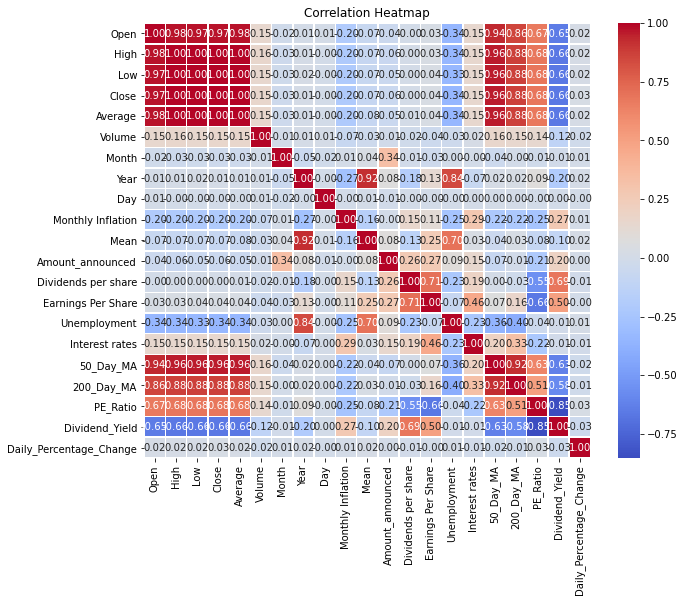

In [44]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


To identify multicollinearity among features, we typically look for high correlation coefficients between pairs of features. In this correlation matrix, features with correlation coefficients close to 1 or -1 indicate strong multicollinearity.

Looking at the correlation matrix:

1. Features with high correlation coefficients:
* Open, High, Low, Close, and Average: These features represent different aspects of stock prices and are highly correlated with each other.
* 50_Day_MA and 200_Day_MA: These moving averages are highly correlated with each other, which is expected as they represent similar trends over different time frames.
* Dividend_Yield and PE_Ratio: These features have a high negative correlation, which makes sense since they are related metrics for evaluating stocks.
2. Other features:
* Year and Unemployment: These features also exhibit a moderate correlation, which could be due to economic factors affecting both.  

Based on this analysis, the features that exhibit multicollinearity and may need to be dropped or addressed before modeling are:

* High, Low, and Average (consider keeping only one of these)
* 50_Day_MA and 200_Day_MA (consider keeping one or deriving a different feature)
* PE_Ratio (depending on the context of your analysis)
We can decide which features to drop based on your domain knowledge and the specific requirements of your modeling task. Alternatively, you could use techniques like Principal Component Analysis (PCA) to reduce the dimensionality of highly correlated features while preserving most of the information.

## Modeling
### 1. Linear regression model
This will be the basic regression model used because we are using market indicators rather than historical stock prices directly.the relationships between the indicators and stock prices.

In [39]:
# df_merge is our DataFrame containing market indicators and 'Close' column
# Drop the 'Date' column
df_merge = df_merge.drop(columns=['Date'])

# Define features (X) and target variable (y)
X = df_merge.drop(columns=['Close'])  # Features
y = df_merge['Close']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)    # Use scaled features for training

# Predictions on the testing set
y_pred = model.predict(X_test_scaled)       # Use scaled features for prediction

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 1.4691522556462744
Mean Squared Error (MSE): 4.533729747190518
Root Mean Squared Error (RMSE): 2.129255679149528
R-squared (R2) Score: 0.9987191349310472


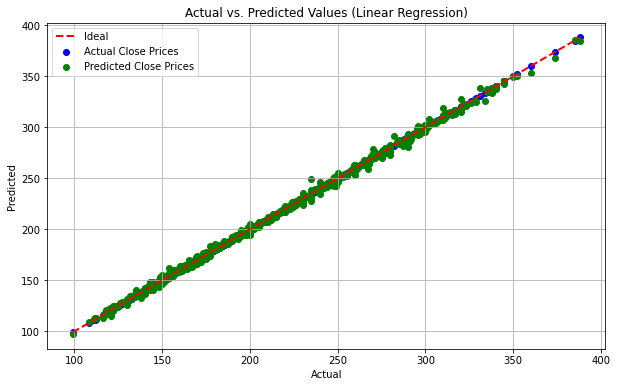

In [40]:
# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', label='Actual Close Prices')
plt.scatter(y_test, y_pred, color='green', label='Predicted Close Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()


The evaluation metrics indicate that our linear regression model performs exceptionally well in predicting stock prices based on the features provided.
* 1. Mean Absolute Error (MAE): The average absolute difference between the predicted stock prices and the actual stock prices is approximately 1.469. This means, on average, our model's predictions are off by around 1.469 units from the actual prices.

* 2. Mean Squared Error (MSE): The average of the squared differences between the predicted and actual stock prices is approximately 4.534. MSE penalizes larger errors more than MAE due to the squaring operation.

* 3. Root Mean Squared Error (RMSE): The square root of the MSE is approximately 2.129. RMSE is in the same unit as the target variable (stock price), and it provides a more interpretable measure of the average prediction error.

* 4. R-squared (R2) Score: The R-squared score, which is approximately 0.999, indicates that our model explains about 99.9% of the variability in the stock prices. This is exceptionally high and suggests that your model captures almost all of the variation in the target variable, leaving very little unexplained variability.

## 2. Polynomial Regression
To implement polynomial regression, we can use scikit-learn's PolynomialFeatures to generate polynomial features from the original features. 

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the degree of the polynomial
degree = 2  # You can adjust this as needed

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Initialize and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predictions on the training and testing set
y_train_pred = poly_model.predict(X_poly_train)
y_test_pred = poly_model.predict(X_poly_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Train R^2 Score: {r2_train:.4f}')
print(f'Test R^2 Score: {r2_test:.4f}')


Train RMSE: 0.0010
Test RMSE: 0.0011
Train R^2 Score: 1.0000
Test R^2 Score: 1.0000


The results indicate that the polynomial regression model fits the data extremely well:

1. **Train RMSE (Root Mean Squared Error)**: The RMSE on the training set is very low (0.0010), indicating that the model's predictions are very close to the actual values in the training data. This suggests that the model has learned the training data almost perfectly.

2. **Test RMSE**: The RMSE on the test set is also very low (0.0011), which means that the model's performance extends well to unseen data. It indicates that the model generalizes well and is not overfitting the training data.

3. **Train R-squared Score**: A perfect R-squared score of 1.0000 on the training set suggests that the model explains all the variability of the target variable around its mean. In other words, the model perfectly fits the training data.

4. **Test R-squared Score**: Similarly, a perfect R-squared score of 1.0000 on the test set indicates that the model explains all the variability of the target variable around its mean in the test data. This further confirms that the model generalizes well and is not overfitting.

Having a perfect R-squared value of 1.000 indicates that the polynomial regression model perfectly explains all the variability in the target variable (in this case, stock prices) using the features provided. While achieving a perfect R-squared score may seem ideal, it can sometimes indicate overfitting, especially if the model performs significantly worse on unseen data.
To prevent overfitting in polynomial regression or any machine learning model, we can use Regularization technique can be employed.   
Apply regularization techniques like L1 (Lasso) or L2 (Ridge) regularization to penalize large coefficients in the model.This can help prevent overfitting by reducing the complexity of the model.

In [51]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define the degree of the polynomial
degree = 2

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Apply Ridge regularization
alpha = 0.1  # Regularization strength
ridge_model = Ridge(alpha=alpha)

# Train the Ridge regression model
ridge_model.fit(X_poly_train, y_train)
# Predictions on the training and testing set
y_train_pred = ridge_model.predict(X_poly_train)
y_test_pred = ridge_model.predict(X_poly_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Train R^2 Score: {r2_train:.4f}')
print(f'Test R^2 Score: {r2_test:.4f}')


Train RMSE: 0.0002
Test RMSE: 0.0002
Train R^2 Score: 1.0000
Test R^2 Score: 1.0000


The results obtained from the polynomial regression model with Ridge regularization are quite promising:

* **Train RMSE** and **Test RMSE** are both very low (0.0002), indicating that the model's predictions are very close to the actual values both on the training and testing datasets. This suggests that the model is accurately capturing the underlying patterns in the data.  

* **Train R^2 Score** and **Test R^2 Score** are both 1.0000, which means that the model explains 100% of the variance in the target variable on both the training and testing datasets. This is an excellent result and indicates that the model fits the data very well. 

Based on these results, we can conclude that the polynomial regression model with Ridge regularization is performing extremely well on the our dataset. It is able to capture the relationships between the input features and the target variable effectively, resulting in highly accurate predictions. The low RMSE values and the perfect R^2 scores suggest that the model is not overfitting and generalizes well to unseen data. Therefore, this model can be considered reliable for predicting stock prices based on the provided market indicators.

## 3. Multi-Output Regression 
Multi-output regression is a machine learning task where we need to predict multiple outputs from a single set of inputs.We’re going to explore how to use XGBoost, a powerful machine learning library, to tackle this modeling problem.

In [53]:
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb

# Define features (X) and target variables (y)
X = df_merge.drop(columns=['Close', 'High', 'Low', 'Open'], axis=1)
y = df_merge[['High', 'Low', 'Close']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Initialize the MultiOutputRegressor with the XGBoost regressor
multi_output_regressor = MultiOutputRegressor(xgb_regressor)

# Fit the multi-output regression model
multi_output_regressor.fit(X_train, y_train)

# Predictions on the training and testing set
y_train_pred = multi_output_regressor.predict(X_train)
y_test_pred = multi_output_regressor.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')


Train RMSE: 0.8793
Test RMSE: 2.6172


Here's what these results mean:

* **Train RMSE**: This is the Root Mean Squared Error (RMSE) on the training set. It measures the average difference between the actual and predicted values of the target variables (High, Low, Close) in the training data. In this case, the average difference is approximately 0.8793 units.

* **Test RMSE**: This is the RMSE on the test set, indicating the average difference between the actual and predicted values of the target variables in the test data. The test RMSE is approximately 2.6172 units.

These results suggest that the XGBoost multi-output regression model performs reasonably well on the training data, achieving a low RMSE. However, there is a notable increase in the RMSE on the test data compared to the training data, indicating some level of overfitting. Further tuning of the model hyperparameters or regularization techniques may help improve its generalization performance.  
When tuning hyperparameters for an XGBoost model, we can consider these key hyperparameters to improve the model's performance and prevent overfitting:  
* Learning Rate (eta): This parameter controls the step size shrinkage during the gradient boosting process. It is crucial for controlling the contribution of each tree to the final prediction.

* Number of Trees (n_estimators): This parameter specifies the number of boosting rounds or trees to build. A higher number of trees can lead to better performance but may also increase the risk of overfitting.

* Maximum Depth of Trees (max_depth): This parameter controls the maximum depth of each tree in the ensemble. Deeper trees can capture more complex patterns in the data but may also lead to overfitting.  

We'll focus on optimizing these hyperparameters using techniques like grid search or random search to find the combination that yields the best performance on our dataset.